# AI Art Detector: Distinguishing AI-Generated vs Human-Created Ukiyo-e Art


## 1. Data Collection and Loading

### 1.1 Dataset Loading

loading ukiyo-e dataset
Looking for AI images in: /Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art-Detector/data/AI_SD_ukiyo-e
Looking for Human images in: /Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art-Detector/data/Human_Ukiyo_e
Dataset Statistics:
Total images: 2475
Human images: 1167
AI images: 1308

Image Dimensions Statistics:

Human Images:
Width  - Mean: 1691, Min: 1381, Max: 6273
Height - Mean: 1856, Min: 1381, Max: 5839

AI Images:
Width  - Mean: 768, Min: 768, Max: 768
Height - Mean: 768, Min: 768, Max: 768


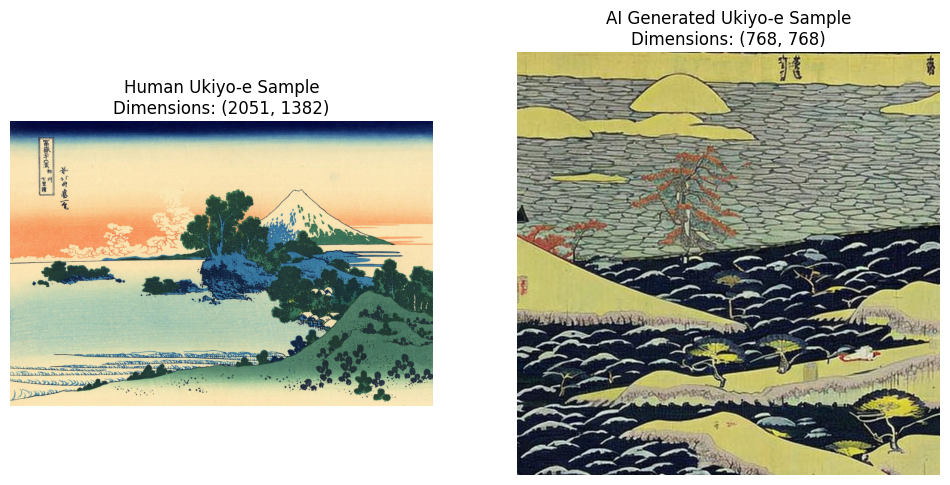

In [4]:
# Import dataset locally
from data_preprocessing.loader import load_ukiyo_e_dataset
df = load_ukiyo_e_dataset()
df_copy = df.copy()

### 1.2 Dataset Information

In [24]:
from data_preprocessing.standarize import get_image_metadata, get_dataset_statistics, print_dataset_summary

get_dataset_statistics(df)


{'total_images': 2475, 'ai_generated': 1308, 'human_created': 1167}

In [25]:
print_dataset_summary(df)

=== Dataset Summary ===

Total Images: 2475
AI Generated: 1308
Human Created: 1167

Dataset Statistics:
             width       height
count  2475.000000  2475.000000
mean   1203.103434  1281.133737
std     570.304059   668.094891
min     768.000000   768.000000
25%     768.000000   768.000000
50%     768.000000   768.000000
75%    1382.000000  1918.500000
max    6273.000000  5839.000000


## 2. Data Exploration

### 2.1 Basic Dataset Statistics/Analysis

In [26]:
from sympy import false
from data_preprocessing.analyze import load_or_process_dataset, analyze_dataset, plot_size_distribution, plot_brightness_analysis, plot_sample_color_distributions, generate_summary_report
#df = analyze_dataset(data_dir="data")
df = load_or_process_dataset(force_reprocess=false)
print("\nDataset Overview:")
print(f"Total number of images: {len(df)}")
print(f"Number of AI images: {len(df[df['label'] == 'AI'])}")
print(f"Number of Human images: {len(df[df['label'] == 'Human'])}")

Loading cached dataset...
Loaded 2475 samples from cache

Dataset Overview:
Total number of images: 2475
Number of AI images: 1308
Number of Human images: 1167


### 2.2 Color Analysis (Saturation)

In [27]:
import os
os.makedirs('outputs', exist_ok=True)
print("\nAnalyzing color distributions...")
plot_sample_color_distributions(df)


Analyzing color distributions...


### 2.3 Brightness Analysis

In [28]:
print("\nAnalyzing brightness characteristics...")
plot_brightness_analysis(df)


Analyzing brightness characteristics...


### 2.4 Generate and display summary report

In [29]:
print("\nGenerating summary report...")
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning, module='scipy.stats')
summary = generate_summary_report(df)
print(summary)
from data_preprocessing.analyze import analyze_features
analyze_features(df)
df.to_csv('outputs/dataset_metadata.csv', index=False)
print("\nAnalysis results saved to 'outputs' directory")





Generating summary report...

    Ukiyo-e Dataset Analysis Summary

    Dataset Composition:
    ------------------
    Total Images: 2475
    AI-generated: 1308
    Human-created: 1167

    Color Characteristics:
    -------------------
    RGB Means:
        AI     - R: 128.6, G: 127.6, B: 111.4
        Human  - R: 161.3, G: 147.6, B: 127.9
    
    Color Ratios:
        AI     - R: 0.350, G: 0.347, B: 0.303
        Human  - R: 0.371, G: 0.337, B: 0.292

    Texture and Line Features:
    -----------------------
    Edge Density:
        AI     - Mean: 0.122, Std: 0.032
        Human  - Mean: 0.097, Std: 0.054
    
    Line Statistics:
        AI     - Count: 2305.6, Density: 0.0039
        Human  - Count: 9942.9, Density: 0.0033

    Contrast Analysis:
    ---------------
    Michelson Contrast:
        AI     - Mean: 3873091.014, Std: 31093694.442
        Human  - Mean: 24445600.409, Std: 74708716.970
    
    RMS Contrast:
        AI     - Mean: 0.443, Std: 0.078
        Human  -

## 3. Data Preprocessing


### 3.1 Image Standardization

In [6]:
import data_preprocessing.standarize as std
center_df = std.process_dataset(df_copy, technique="center_crop")

Folder Human_center_crop already exists, skipping processing


### Center crops the image so that size is all consistent

In [7]:
center_df

,path,width,height,label,original_path,original_width,original_height,target_label,original_aspect_ratio
0,/Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art...,1382,2078,human,data/Human_Ukiyo_e/utagawa-kunisada_not_detect...,1382,2078,0,0.665063
1,/Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art...,1382,1949,human,data/Human_Ukiyo_e/utagawa-kuniyoshi_yada-goro...,1382,1949,0,0.709082
2,/Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art...,1382,4272,human,data/Human_Ukiyo_e/tsukioka-yoshitoshi_lin-cho...,1382,4272,0,0.323502
3,/Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art...,6273,1382,human,data/Human_Ukiyo_e/utagawa-kuniyoshi_women-23.jpg,6273,1382,0,4.539074
4,/Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art...,1382,2154,human,data/Human_Ukiyo_e/utagawa-kunisada_not_detect...,1382,2154,0,0.641597
...,...,...,...,...,...,...,...,...,...
2470,/Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art...,768,768,ai,data/AI_SD_ukiyo-e/9-934092758-844990.jpg,768,768,1,1.000000
2471,/Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art...,768,768,ai,data/AI_SD_ukiyo-e/9-964411806-595958.jpg,768,768,1,1.000000
2472,/Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art...,768,768,ai,data/AI_SD_ukiyo-e/9-846172161-510890.jpg,768,768,1,1.000000
2473,/Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art...,768,768,ai,data/AI_SD_ukiyo-e/9-955674977-242618.jpg,768,768,1,1.000000


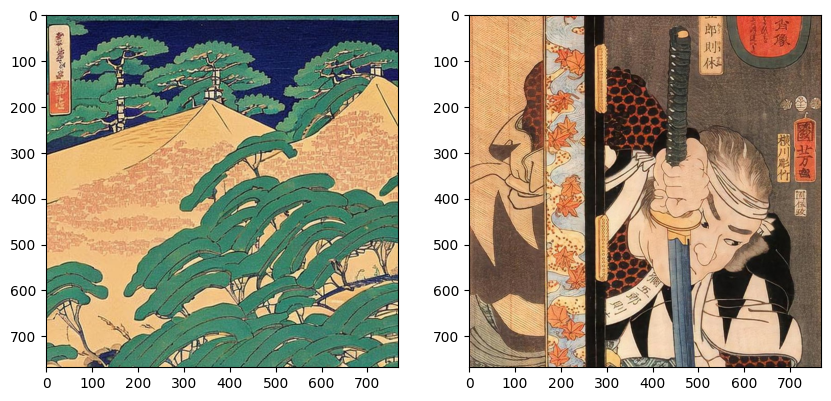

,path,width,height,label,original_path,original_width,original_height,target_label,original_aspect_ratio
1251,/Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art...,768,768,ai,data/AI_SD_ukiyo-e/9-82801754-206944.jpg,768,768,1,1.000000
38,/Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art...,1382,2032,human,data/Human_Ukiyo_e/utagawa-kuniyoshi_kansaki-y...,1382,2032,0,0.680118


In [8]:
std.sample_random_images(center_df)

### 3.2 Feature Extraction

In [33]:



cache_path = 'outputs/processed_features.csv'
os.makedirs('outputs', exist_ok=True)

#print("Saving processed dataset to cache...")
#df.to_csv(cache_path, index=False)

print(f"Saved {len(df)} samples to {cache_path}")
#df = load_or_process_dataset(force_reprocess=False)
#only keep the top features
top_features = [
            'entropy',
            'line_count',
            'saturation_mean',
            'saturation_quartile_3',
            'red_mean',
            'hue_bin_0',
            'saturation_median',
            'local_contrast_3x3_std',
            'saturation_quartile_1',
            'hue_bin_3',
            'label',  # Keep the label column
            'path'    # Keep the path column for reference
        ]

df = df[top_features]
extracted_features_path = 'outputs/extracted_features.csv'
print(f"Created subset with {len(df)} samples and {len(top_features)} features")
print(df.head())

# Save the extracted features to a new file
df.to_csv(extracted_features_path, index=False)
print(f"Saved extracted features to {extracted_features_path}")





Saved 2475 samples to outputs/processed_features.csv
Created subset with 2475 samples and 12 features
         entropy  line_count  saturation_mean  saturation_quartile_3  \
0  215169.160035      2602.0        99.521856                  153.0   
1  254019.636532      2345.0       110.371982                  135.0   
2  196690.205887      2914.0       113.020121                  167.0   
3  256181.859299      1365.0       102.943629                  142.0   
4  235513.339564      1920.0       110.748781                  156.0   

     red_mean  hue_bin_0  saturation_median  local_contrast_3x3_std  \
0  127.029017   0.282754               77.0               38.011258   
1  111.750520   0.202545              102.0               28.196544   
2  148.819463   0.357001              101.0               48.037960   
3  117.537884   0.240323               99.0               38.518299   
4  140.988469   0.352948               99.0               37.923674   

   saturation_quartile_1  hue_bin_3 la

## 4. Model Implementation

### 4.1 Logisic Regression

In [9]:
from model.logistic import LogisticRegression
from model.logistic import train_and_evaluate_model
import matplotlib.pyplot as plt
import seaborn as sns



### 4.2 CNN

In [10]:
from model.cnn import CNN
train_df, val_df, test_df = std.split_dataset(center_df)


Original class distribution:
ai: 1308 images
human: 1167 images

Balanced dataset size: 2334 images (1167 per class)

Dataset split summary:
Training set: 1633 images
Validation set: 350 images
Test set: 351 images

Class distribution for Training:
human: 826 images
ai: 807 images

Class distribution for Validation:
ai: 182 images
human: 168 images

Class distribution for Test:
ai: 178 images
human: 173 images


## 5. Model Training and Evaluation

### 5.1 Logistic Regression Training Pipeline

In [11]:

# Train and evaluate the model with your dataframe

model, (X_train, X_test, y_train, y_test) = train_and_evaluate_model(df)


Starting model training and evaluation...

Data split:
Training samples: 1979 (AI: 1046, Human: 933)
Test samples: 496 (AI: 262, Human: 234)

Training model...
Cost after iteration 0: 0.678294
Cost after iteration 100: 0.298032
Cost after iteration 200: 0.201712
Cost after iteration 300: 0.157235
Cost after iteration 400: 0.131049
Cost after iteration 500: 0.113544
Cost after iteration 600: 0.100895
Cost after iteration 700: 0.091262
Cost after iteration 800: 0.083643
Cost after iteration 900: 0.077443
Cost after iteration 1000: 0.072283
Cost after iteration 1100: 0.067912
Cost after iteration 1200: 0.064154
Cost after iteration 1300: 0.060883
Cost after iteration 1400: 0.058006
Cost after iteration 1500: 0.055454
Cost after iteration 1600: 0.053170
Cost after iteration 1700: 0.051114
Cost after iteration 1800: 0.049252
Cost after iteration 1900: 0.047555

Evaluating model...

Training Set Performance:
Accuracy: 0.9970

Individual Test Predictions:

Sample 1:
Path: data/Human_Ukiyo_e/

### 5.2 Logistic Regression Evaluation Pipeline


Model Performance Summary:
Training set size: 1979 samples
Test set size: 496 samples


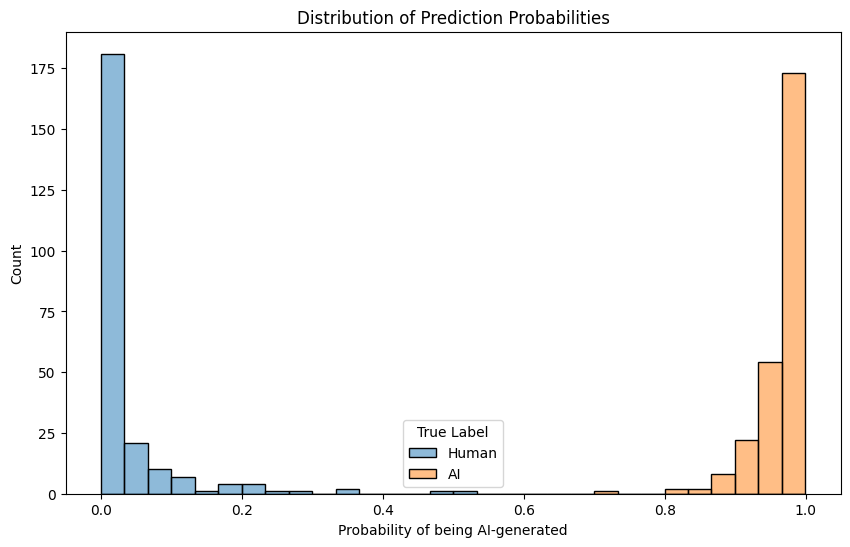

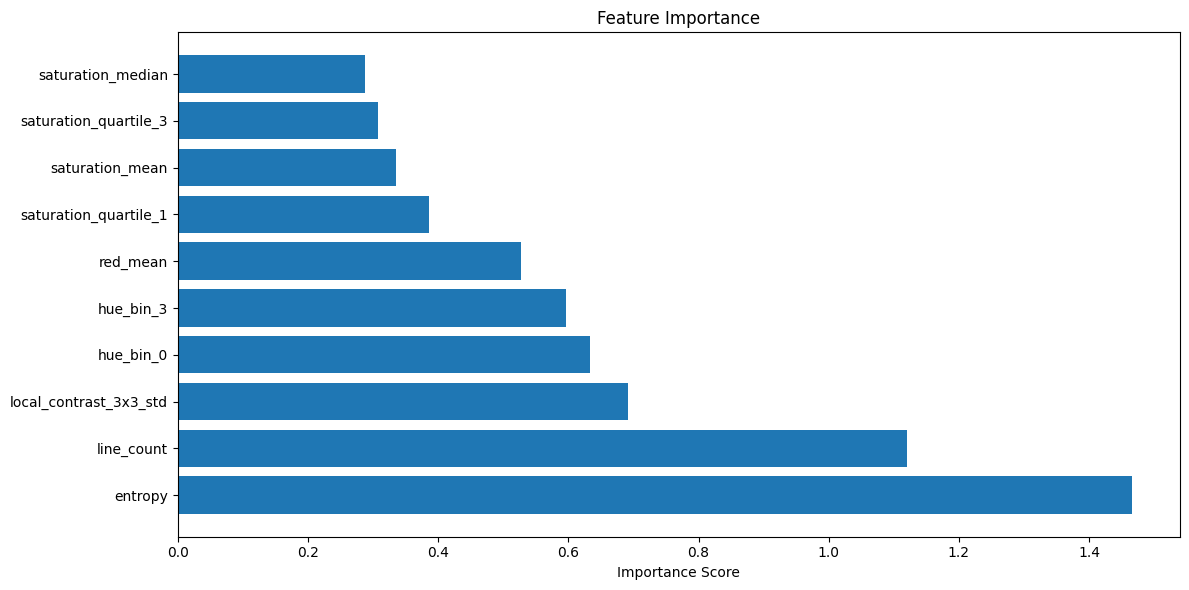

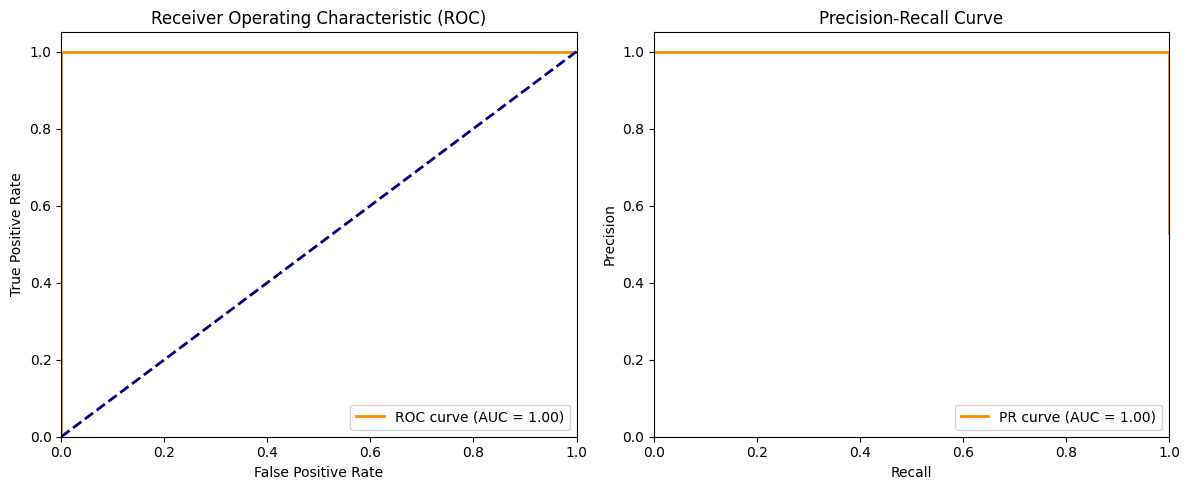


Performance at different thresholds:
Threshold  |  Accuracy  | Precision  |   Recall   |     F1    
--------------------------------------------------
   0.30    |   0.992    |   0.985    |   1.000    |   0.992   
   0.40    |   0.996    |   0.992    |   1.000    |   0.996   
   0.50    |   0.998    |   0.996    |   1.000    |   0.998   
   0.60    |   1.000    |   1.000    |   1.000    |   1.000   
   0.70    |   1.000    |   1.000    |   1.000    |   1.000   


In [12]:
from model.evaluate_logistic import evaluate_model

evaluate_model(model, X_train, X_test, y_train, y_test)

### 5.3 CNN Training Pipeline

In [11]:
from model.cnn import CNN
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from data_preprocessing.analyze import load_or_process_dataset

# Define learning rates to try
learning_rates = [0.001, 0.0001, 0.00001]
results = []

model = CNN(learning_rate=0.0001, num_epochs=5, batch_size=3)

losses, best_val_loss = model.fit(train_df, val_df)

for lr in learning_rates:
    model = CNN(learning_rate=lr, num_epochs=5, batch_size=3)
    losses, best_val_loss = model.fit(train_df, val_df)

    # Save the results
    results.append({
        'learning_rate': lr,
        'best_val_loss': best_val_loss,
        'losses': losses
    })

# Display the results
for result in results:
    print(f"Learning Rate: {result['learning_rate']}")
    print(f"Best Validation Loss: {result['best_val_loss']}")
    print("Losses per epoch:")
    for i, loss in enumerate(result['losses']):
        print(f"Epoch {i+1}: {loss}")
    



### 5.4 CNN Evaluation Pipeline

In [9]:
for result in results:
    print(f"Learning Rate: {result['learning_rate']}")
    print(f"Best Validation Loss: {result['best_val_loss']}")
    print("Losses per epoch:")
    for i, loss in enumerate(result['losses']):
        print(f"Epoch {i+1}: {loss}")

Learning Rate: 0.001
Best Validation Loss: 0.12582195955368444
Losses per epoch:
Epoch 1: 0.5166269692049763
Epoch 2: 0.2510120873527448
Epoch 3: 0.20612652796023437
Epoch 4: 0.16764729386855048
Epoch 5: 0.15387883998433993
Learning Rate: 0.0001
Best Validation Loss: 0.09163002401878774
Losses per epoch:
Epoch 1: 0.5027728374705676
Epoch 2: 0.24559189833000028
Epoch 3: 0.18112564554540525
Epoch 4: 0.1435755367903466
Epoch 5: 0.108168054732399
Learning Rate: 1e-05
Best Validation Loss: 0.31348854074111354
Losses per epoch:
Epoch 1: 0.6909747218866961
Epoch 2: 0.6743066385251666
Epoch 3: 0.6137613327131359
Epoch 4: 0.4916975321572855
Epoch 5: 0.39298744178419814


In [14]:
best_model = CNN(learning_rate=0.0001, num_epochs=10, batch_size=3, load_weights_path="/Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art-Detector/cnn_weights_epoch_5_lr_0.0001_bs_3.pth")


Loading weights from: /Users/zzy/Desktop/PAML/PAML_FINAL_PROJ/AI-Art-Detector/cnn_weights_epoch_5_lr_0.0001_bs_3.pth

Keys in loaded state_dict:
- conv1.weight
- conv1.bias
- conv2.weight
- conv2.bias
- conv3.weight
- conv3.bias
- conv4.weight
- conv4.bias
- fc1.weight
- fc1.bias
- fc2.weight
- fc2.bias
- fc3.weight
- fc3.bias

Keys in current model:
- conv1.weight
- conv1.bias
- conv2.weight
- conv2.bias
- conv3.weight
- conv3.bias
- conv4.weight
- conv4.bias
- fc1.weight
- fc1.bias
- fc2.weight
- fc2.bias
- fc3.weight
- fc3.bias

Weights loaded successfully!
Model moved to device: mps


## 6. Results and Visualization


In [30]:
y_pred_proba = best_model.predict_proba(test_df).flatten()

## 6. Results and Visualization


## 6. Results and Visualization


In [25]:
y_pred = best_model.predict(test_df).flatten()


In [32]:
from model.eval import get_performance_metrics, calculate_accuracy
y_actual =np.array(test_df["target_label"]).flatten()

calculate_accuracy(y_pred, y_actual)

np.float64(0.9829059829059829)

In [33]:
get_performance_metrics(y_pred_proba, y_actual)

{'accuracy': 0.9829059829059829,
 'precision': 0.9831460674157303,
 'recall': 0.9831460674157303,
 'f1_score': 0.9831460674157303,
 'mse': 0.012380106590100621}

In [13]:
from model.logistic import output_model_results
output_model_results()


Model Evaluation Results:
Accuracy: 0.9980
Precision: 0.9962
Recall: 1.0000
F1 Score: 0.9981
MSE: 0.0042

Feature Importance:
entropy: 1.4663
line_count: 1.1206
local_contrast_3x3_std: 0.6911
hue_bin_0: 0.6333
hue_bin_3: 0.5959
red_mean: 0.5274
saturation_quartile_1: 0.3855
saturation_mean: 0.3352
saturation_quartile_3: 0.3074
saturation_median: 0.2877


({'accuracy': array(0.99798387),
  'precision': array(0.99619772),
  'recall': array(1.),
  'f1_score': array(0.99809524),
  'mse': array(0.00424992)},
 {'entropy': 1.4663147187946606,
  'line_count': 1.1205603725662798,
  'local_contrast_3x3_std': 0.6910851171903026,
  'hue_bin_0': 0.6333130680267907,
  'hue_bin_3': 0.5959046411731214,
  'red_mean': 0.5274236877783703,
  'saturation_quartile_1': 0.38545012768321574,
  'saturation_mean': 0.3351566739246275,
  'saturation_quartile_3': 0.30738282324091293,
  'saturation_median': 0.2876976373728403})

## 7. Model Export for Streamlit


In [14]:
#logistic regression
#run python -m logistic.py in terminal and it will export the weights to streamlit